<a href="https://colab.research.google.com/github/Aikhusy/Random/blob/main/ULARNAGA/week3macinlerning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
path='/content/drive/MyDrive/MACHINE LEARNING/insurance.csv'
data = pd.read_csv(path)
data.head()
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
Lakukan feature scaling jika diperlukan.
3. Buat model multiple linear regression menggunakan Scikit-Learn.
4. Latih model pada data latih dan lakukan prediksi pada data uji.
5. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

1. fitur itu ada age	sex	bmi	children	smoker	region,sedangkan target adalah Charges


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['sex_encoded'] = encoder.fit_transform(data['sex'])
data['region_encoded'] = encoder.fit_transform(data['region'])
data['smoker_encoded'] = encoder.fit_transform(data['smoker'])

**Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).**

In [6]:
X = data[['age', 'sex_encoded', 'bmi', 'children', 'smoker_encoded', 'region_encoded']]
y = data['charges']


**Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai. Lakukan feature scaling jika diperlukan.**

In [7]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xTrain)
X_test_scaled = scaler.transform(xTest)

**Buat model multiple linear regression menggunakan Scikit-Learn.**

In [ ]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()

model.fit(xTrain, yTrain)

**Latih model pada data latih dan lakukan prediksi pada data uji.**

In [18]:
prediksi = model.predict(xTest)

**Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.**

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


r2 = r2_score(yTest, prediksi)


mse = mean_squared_error(yTest, prediksi)


mae = mean_absolute_error(yTest, prediksi)

print("R-squared : ", r2)
print("MSE : ", mse)
print("MAE : ", mae)

R-squared :  0.7694415927057693
MSE :  33805466.898688614
MAE :  4155.239843059383


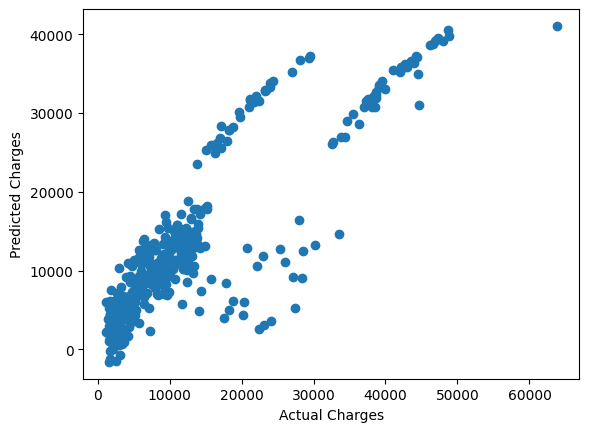

In [15]:
import matplotlib.pyplot as plt

plt.scatter(yTest, prediksi)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()